# Exploratory analysis of Perceptions about Science and Open Science

This analysis revolves around the undergraduate thesis carried out by Franco Sebastián Benítez, under the supervision of Débora Burin and Lucas Cuenya, from the School of Psychology of the University of Buenos Aires.

As set in our preregistration, we are checking the following aspects:

1) Check for exclusion criteria in the demographic data, and in the completion rate.

2) Describe the sample’s demographic characteristics. 

3) Analyse the total percentage of “yes” responses to belief in crisis. Analyse as a function of career stage and methodological approach.

4) Qualitative analysis of open field response to belief in crisis.

5) Percentage of  agreement with each, and combined, statements about replication crisis, p-value, publication bias. Analyse as a function of career stage and methodological approach.

6) Percentage of  agreement with each, and combined, statements about perceived barriers. Analyse as a function of career stage and methodological approach.

7) Percentage of  agreement with each, and combined, statements about attitudes against adopting open science practices. Analyse as a function of career stage and methodological approach.

8) Qualitative analysis of open field response to attitudes about barriers against adopting open science practices.

## Loading the necessary libraries

In [489]:
import pandas as pd                  # data wrangling
import matplotlib.pyplot as plt      # plotting
import seaborn as sns                # plotting 
import re                            # format ages

## Loading the dataset

In [490]:
df = pd.read_csv("../data/Percepciones sobre ciencia y ciencia abierta.csv")

In [491]:
df

,Timestamp,¿Acepta participar?,Edad (años),Nivel educativo alcanzado,Área/s de investigación,"¿Ha participado en un proyecto de investigación (v. g., UBACyT, CONICET) en los últimos 5 años?","¿Ha publicado en una revista indexada con referato (v. g., Scopus, Scimago, Scielo) en los últimos 5 años?",Marque su posición actual en la Facultad de Psicología de la UBA,¿Qué tipo de metodología suele predominar en sus estudios?,¿Cree que hay una crisis en la ciencia?,...,"[Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos].1",[Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio].1,[Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza],[Usar revisión por partes abierta],[Publicar en revistas de acceso abierto].1,[Adaptar un test psicométrico].1,[Participar en proyectos abiertos y colaborativos a gran escala].1,¿Cuáles le parecen que son las mayores barreras para la aceptación y puesta en práctica de prácticas de ciencia abierta en su campo y/o lugar de trabajo?,"Si aplica, por favor describa brevemente qué barreras ha experimentado para incorporar o mantener prácticas de ciencia abierta","Por último, si posee alguna idea o comentario respecto a esta encuesta o al tema que aborda, por favor escribalo brevemente a continuación"
0,2021/04/16 11:57:53 AM GMT-3,Sí,37,Licenciado,Psicoanálisis Filosofía,Sí,Sí,ATP,Cualitativa,No,...,No sé,No sé,No sé,Poco importante,Medianamente importante,No sé,No sé,9. No percibo ninguna barrera,NaN,NaN
1,2021/04/16 12:13:54 PM GMT-3,Sí,48,Doctorado,Alcohol,Sí,Sí,Adjunto;Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
2,2021/04/16 2:43:17 PM GMT-3,Sí,37,Doctorado,Neurociencia cognitiva,Sí,Sí,Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;6. Falta de financiamie...,Economia! Muchas veces hay qeu pagar para que ...,NaN
3,2021/04/16 3:33:59 PM GMT-3,Sí,31,Doctorado,Psicoterapia,Sí,Sí,Titular;Ademas cargo Investigacion/docente,Cuantitativa,Sí,...,Muy importante,Muy importante,Poco importante,Muy importante,Medianamente importante,Muy importante,Medianamente importante,1. Falta de incentivos;3. Falta de información...,NaN,NaN
4,2021/04/16 3:35:35 PM GMT-3,Sí,38,Doctorado,Psicología del desarrollo,Sí,Sí,ATP,Cuantitativa,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,2. Falta de requerimiento por parte de financi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2021/07/15 11:23:41 AM GMT-3,Sí,43,Doctorado,orientación vocacional y ocupacional,Sí,Sí,ATP,Cualitativa,No,...,Muy importante,Muy importante,Medianamente importante,Medianamente importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,"no me halle muy representada en los items, es ..."
90,2021/07/20 2:40:53 PM GMT-3,Sí,27,Licenciado,Psicologia del desarrollo,Sí,Sí,Co ayudante (recibida) y mi lugar de trabajo e...,Cuantitativa,Sí,...,Muy importante,Muy importante,Poco importante,Medianamente importante,Muy importante,Muy importante,Medianamente importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
91,2021/07/20 2:52:30 PM GMT-3,Sí,36,Especialización;Maestría,Evaluación psicológica,Sí,Sí,ATP,Cuantitativa,Sí,...,Muy importante,Muy importante,Muy importante,Poco importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,Ninguna,NaN
92,2021/07/20 3:01:53 PM GMT-3,Sí,28,Estudiante de licenciatura,"Orignalmente psicología del desarrollo, recien...",Sí,No,ATP,Cuantitativa,No,...,Medianamente importante,Muy importante,Muy importante,Medianamente importante

In [492]:
df.shape

(94, 53)

The data contains 53 columnas and 40 rows.

Now let's rename the columns to make it easier to manipulate.

In [493]:
column_names = {"Timestamp": "timestamp",
                "¿Acepta participar?": "consent",
                "Edad (años)": "age",
                "Nivel educativo alcanzado": "education",
                "Área/s de investigación": "area",
                "¿Ha participado en un proyecto de investigación (v. g., UBACyT, CONICET) en los últimos 5 años?": "project",
                "¿Ha publicado en una revista indexada con referato (v. g., Scopus, Scimago, Scielo) en los últimos 5 años?": "journal",
                "Marque su posición actual en la Facultad de Psicología de la UBA": "position",
                "¿Qué tipo de metodología suele predominar en sus estudios?": "methodology",
                "¿Cree que hay una crisis en la ciencia?": "belief",
                "Si su respuesta a la pregunta anterior ha sido “Sí”, señale por qué cree que hay una crisis en la ciencia": "belief_comments",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas]": "Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [A las revistas científicas no les interesa publicar resultados que no son estadísticamente significativos]": "A las revistas científicas no les interesa publicar resultados que no son estadísticamente significativos",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Cuando leo un artículo tengo mayor confianza en la calidad del estudio si los resultados son estadísticamente significativos]": "Cuando leo un artículo tengo mayor confianza en la calidad del estudio si los resultados son estadísticamente significativos",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Que un resultado no fuera estadísticamente significativo sería un criterio para no seguir investigando esas variables]": "Que un resultado no fuera estadísticamente significativo sería un criterio para no seguir investigando esas variables",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Una conclusión científica (por ejemplo, si un tratamiento es mejor que otro) debe estar basado en si el p-valor es o no es estadísticamente significativo]": "Una conclusión científica (por ejemplo, si un tratamiento es mejor que otro) debe estar basado en si el p-valor es o no es estadísticamente significativo",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Un resultado estadísticamente significativo es un resultado importante]": "Un resultado estadísticamente significativo es un resultado importante",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [El valor de p < .05 confirma que el hallazgo será útil para la comunidad científica]": "El valor de p < .05 confirma que el hallazgo será útil para la comunidad científica",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [El valor de p = .001 confirma que el tamaño del efecto ha sido grande]": "El valor de p = .001 confirma que el tamaño del efecto ha sido grande",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Cuando los resultados de diferentes investigadores son contradictorios entonces sería necesario llevar a cabo un estudio de replicación sobre la misma temática]": "Cuando los resultados de diferentes investigadores son contradictorios entonces sería necesario llevar a cabo un estudio de replicación sobre la misma temática",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [La realización de estudios de replicación es necesaria para el avance de la ciencia]": "La realización de estudios de replicación es necesaria para el avance de la ciencia",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Si los resultados sobre una determinada temática son unánimes por parte de diferentes equipos de investigación entonces los estudios de replicación no son necesarios]": "Si los resultados sobre una determinada temática son unánimes por parte de diferentes equipos de investigación entonces los estudios de replicación no son necesarios",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Los estudios de replicación solamente tienen sentido cuando no se detectan diferencias estadísticamente significativas en el estudio original]": "Los estudios de replicación solamente tienen sentido cuando no se detectan diferencias estadísticamente significativas en el estudio original",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [No es necesario replicar un estudio cuando ya se detectaron efectos estadísticamente significativos en el estudio original]": "No es necesario replicar un estudio cuando ya se detectaron efectos estadísticamente significativos en el estudio original",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [El principal objetivo de las revistas científicas es publicar hallazgos novedosos]": "El principal objetivo de las revistas científicas es publicar hallazgos novedosos",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [La ciencia avanza más con estudios que plantean hipótesis novedosas que con estudios de replicación de otras investigaciones]": "La ciencia avanza más con estudios que plantean hipótesis novedosas que con estudios de replicación de otras investigaciones",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Creo que, en general, los errores que se pueden haber cometido en un estudio científico siempre se detectan y corrigen antes de ser publicados]": "Creo que, en general, los errores que se pueden haber cometido en un estudio científico siempre se detectan y corrigen antes de ser publicados",
                "Valore cada una de las siguientes cuestiones relacionadas con su opinión sobre la ciencia [Las tareas de revisión y corrección de los manuscritos que llevan a cabo los revisores de las revistas garantizan de forma fiable la calidad de los resultados científicos]": "Las tareas de revisión y corrección de los manuscritos que llevan a cabo los revisores de las revistas garantizan de forma fiable la calidad de los resultados científicos",
                " [Replicar un estudio previo]": "previous_replication_1",
                " [Pre-registrar un estudio antes de iniciar la recolección de datos]": "previous_preregistration_1",
                " [Poner datos recolectados a disposición mediante plataformas o repositorios públicos.]": "public_data_1",
                " [Compartir los métodos analíticos (e.g., scripts de análisis) en plataformas o repositorios públicos]": "shared_scripts_1",
                " [Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos]": "public_materials_1",
                " [Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio]": "report_1",
                " [Compartir una pre-impresión (pre-print) publicándola en un repositorio público o semi-público]": "preprint_1",
                " [Usar revisión por pares abierta]": "open_review_usage_1",
                " [Publicar en revistas de acceso abierto]": "open_review_publication_1",
                " [Adaptar un test psicométrico]": "adapt_1",
                " [Participar en proyectos abiertos y colaborativos a gran escala]": "open_projects_1",
                " [Replicar un estudio previo].1": "previous_replication_2",
                " [Pre-registrar un estudio antes de iniciar la recolección de datos].1": "previous_preregistration_2",
                " [Poner datos recolectados a disposición mediante plataformas o repositorios públicos]": "public_data_2",
                " [Compartir los métodos analíticos (e.g., scripts de análisis) en plataformas o repositorios públicos].1": "shared_scripts_2",
                " [Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos].1": "public_materials_2",
                " [Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio].1": "report_2",
                " [Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza]": "preprint_2",
                " [Usar revisión por partes abierta]": "open_review_usage_2",
                " [Publicar en revistas de acceso abierto].1": "open_review_publication_2",
                " [Adaptar un test psicométrico].1": "adapt_2",
                " [Participar en proyectos abiertos y colaborativos a gran escala].1": "open_projects_2",
                "¿Cuáles le parecen que son las mayores barreras para la aceptación y puesta en práctica de prácticas de ciencia abierta en su campo y/o lugar de trabajo?": "barriers_1",
                "Si aplica, por favor describa brevemente qué barreras ha experimentado para incorporar o mantener prácticas de ciencia abierta": "barriers_2",
                "Por último, si posee alguna idea o comentario respecto a esta encuesta o al tema que aborda, por favor escribalo brevemente a continuación ": "comments"
               }

df.rename(columns = column_names, inplace=True)
df.timestamp = pd.to_datetime(df.timestamp)
df.age = [re.sub(r"[a-zñ]+", "", i) for i in df["age"]]
df.age = pd.to_numeric(df.age, downcast="integer")

Let's check all the types.

In [494]:
df.dtypes

timestamp                                                                                                                                                                     datetime64[ns, pytz.FixedOffset(180)]
consent                                                                                                                                                                                                      object
age                                                                                                                                                                                                            int8
education                                                                                                                                                                                                    object
area                                                                                                                                                    

Let's check all the renamings.

In [495]:
df.columns 

Index(['timestamp', 'consent', 'age', 'education', 'area', 'project',
       'journal', 'position', 'methodology', 'belief', 'belief_comments',
       'Gran parte de los investigadores solamente publica los estudios en donde obtienen diferencias estadísticamente significativas',
       'A las revistas científicas no les interesa publicar resultados que no son estadísticamente significativos',
       'Cuando leo un artículo tengo mayor confianza en la calidad del estudio si los resultados son estadísticamente significativos',
       'Que un resultado no fuera estadísticamente significativo sería un criterio para no seguir investigando esas variables',
       'Una conclusión científica (por ejemplo, si un tratamiento es mejor que otro) debe estar basado en si el p-valor es o no es estadísticamente significativo',
       'Un resultado estadísticamente significativo es un resultado importante',
       'El valor de p < .05 confirma que el hallazgo será útil para la comunidad científica',
  

## Analysis 

### 1) Check for exclusion criteria in the demographic data, and in the completion rate.

In [496]:
exclusion_criteria = df[["project", "journal"]]
excluded = []

i = -1 # to take in account the index 0
for a, b in exclusion_criteria.itertuples(index=False):
    i = i + 1
    if a == "No" and b == "No":
        print(f"Participant n° {i} will be excluded")
        excluded.append(i)

df.drop(excluded, axis=0)

Participant n° 20 will be excluded
Participant n° 26 will be excluded
Participant n° 64 will be excluded
Participant n° 78 will be excluded
Participant n° 80 will be excluded


,timestamp,consent,age,education,area,project,journal,position,methodology,belief,...,public_materials_2,report_2,preprint_2,open_review_usage_2,open_review_publication_2,adapt_2,open_projects_2,barriers_1,barriers_2,comments
0,2021-04-16 11:57:53+03:00,Sí,37,Licenciado,Psicoanálisis Filosofía,Sí,Sí,ATP,Cualitativa,No,...,No sé,No sé,No sé,Poco importante,Medianamente importante,No sé,No sé,9. No percibo ninguna barrera,NaN,NaN
1,2021-04-16 12:13:54+03:00,Sí,48,Doctorado,Alcohol,Sí,Sí,Adjunto;Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
2,2021-04-16 14:43:17+03:00,Sí,37,Doctorado,Neurociencia cognitiva,Sí,Sí,Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;6. Falta de financiamie...,Economia! Muchas veces hay qeu pagar para que ...,NaN
3,2021-04-16 15:33:59+03:00,Sí,31,Doctorado,Psicoterapia,Sí,Sí,Titular;Ademas cargo Investigacion/docente,Cuantitativa,Sí,...,Muy importante,Muy importante,Poco importante,Muy importante,Medianamente importante,Muy importante,Medianamente importante,1. Falta de incentivos;3. Falta de información...,NaN,NaN
4,2021-04-16 15:35:35+03:00,Sí,38,Doctorado,Psicología del desarrollo,Sí,Sí,ATP,Cuantitativa,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,2. Falta de requerimiento por parte de financi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2021-07-15 11:23:41+03:00,Sí,43,Doctorado,orientación vocacional y ocupacional,Sí,Sí,ATP,Cualitativa,No,...,Muy importante,Muy importante,Medianamente importante,Medianamente importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,"no me halle muy representada en los items, es ..."
90,2021-07-20 14:40:53+03:00,Sí,27,Licenciado,Psicologia del desarrollo,Sí,Sí,Co ayudante (recibida) y mi lugar de trabajo e...,Cuantitativa,Sí,...,Muy importante,Muy importante,Poco importante,Medianamente importante,Muy importante,Muy importante,Medianamente importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
91,2021-07-20 14:52:30+03:00,Sí,36,Especialización;Maestría,Evaluación psicológica,Sí,Sí,ATP,Cuantitativa,Sí,...,Muy importante,Muy importante,Muy importante,Poco importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,Ninguna,NaN
92,2021-07-20 15:01:53+03:00,Sí,28,Estudiante de licenciatura,"Orignalmente psicología del desarrollo, recien...",Sí,No,ATP,Cuantitativa,No,...,Medianamente importante,Muy importante,Muy importante,Medianamente importante,Muy importante,Muy importante,Medianamente importante,1. Falta de incentivos;2. Falta de requerimien...,Una de las principales barreras es el hecho de...,Aunque entiendo la lógica hay un problema conc...


Now we have five participants less.

### 2) Describe the sample’s demographic characteristics.

#### 2.1) Education

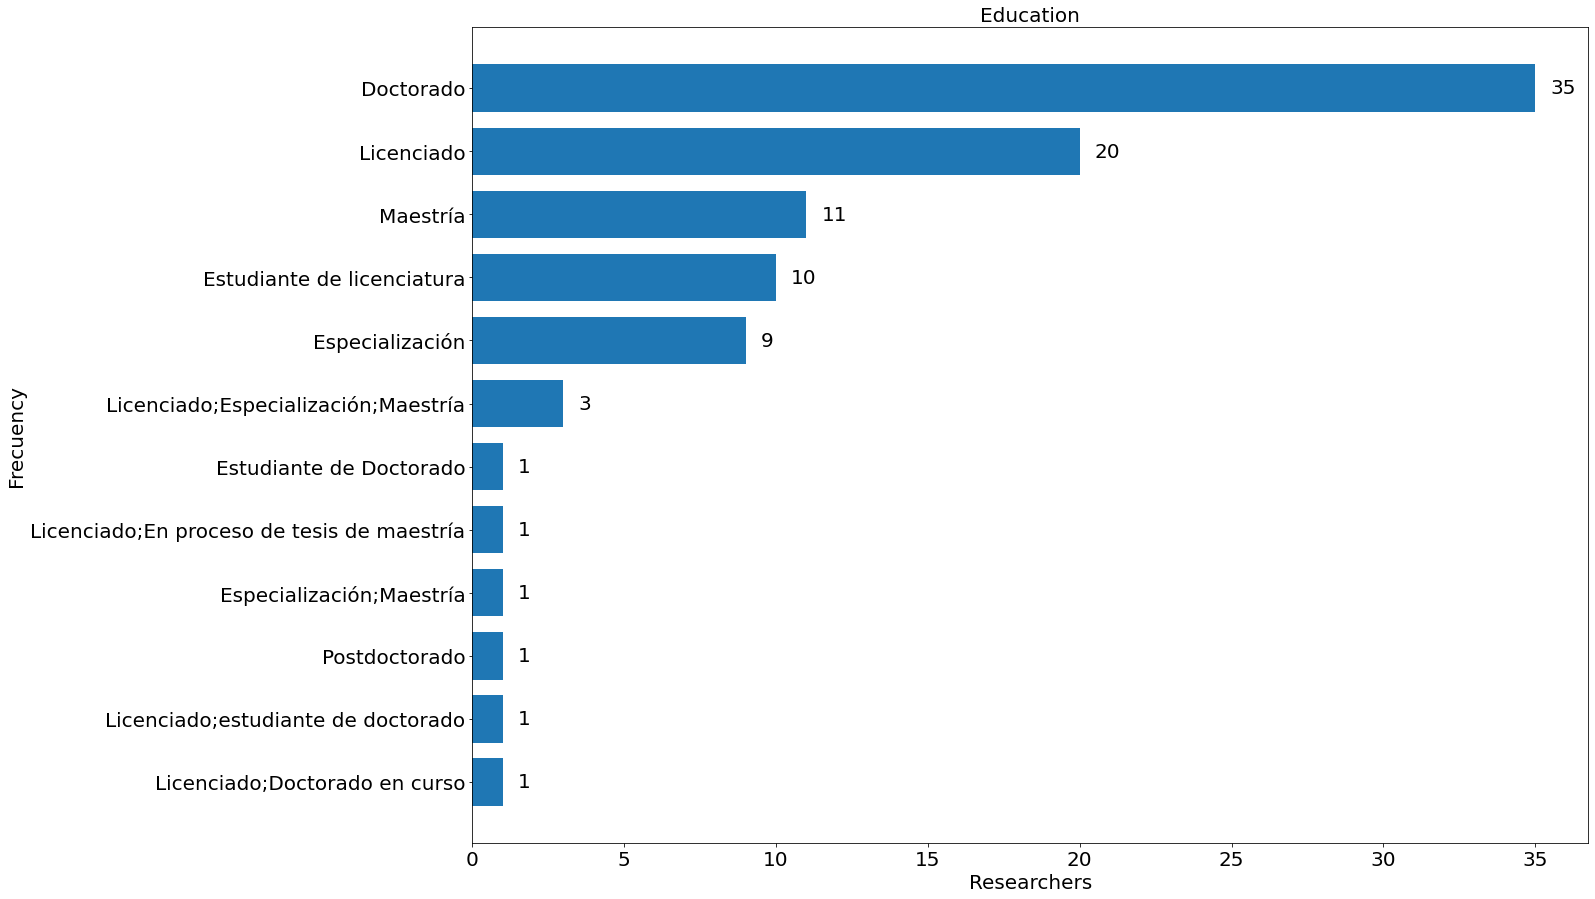

In [497]:
y = df["education"].value_counts(ascending=True)
fig, ax = plt.subplots(figsize=(20,15))
ax.tick_params(labelsize=20)
ax.barh(y.index, y, height=0.75)
ax.set_title('Education', fontsize=20)
ax.set_xlabel("Researchers", fontsize=20)
ax.set_ylabel("Frecuency", fontsize=20)
_, xmax = plt.xlim()
plt.xlim(0, xmax)
for i, v in enumerate(y):
    ax.text(v + .5, i, str(v), fontsize=20, ha='left', va='center')
plt.show()                

[Put something here]

#### 2.2) Research area

In [498]:
df["area"].value_counts()

Psicología                              4
Neuropsicología                         3
Psicología Educacional                  2
Psicología Experimental                 2
Psicología Social Comunitaria           2
                                       ..
orientación vocacional y ocupacional    1
Epidemiología                           1
Emociones en poblacion infantil         1
Psicolingüística y Neurolingüística     1
Ciencia de datos                        1
Name: area, Length: 82, dtype: int64

We can see that this variable does not give us relevant data about the researchers' research area. 

#### 2. 3) Position 

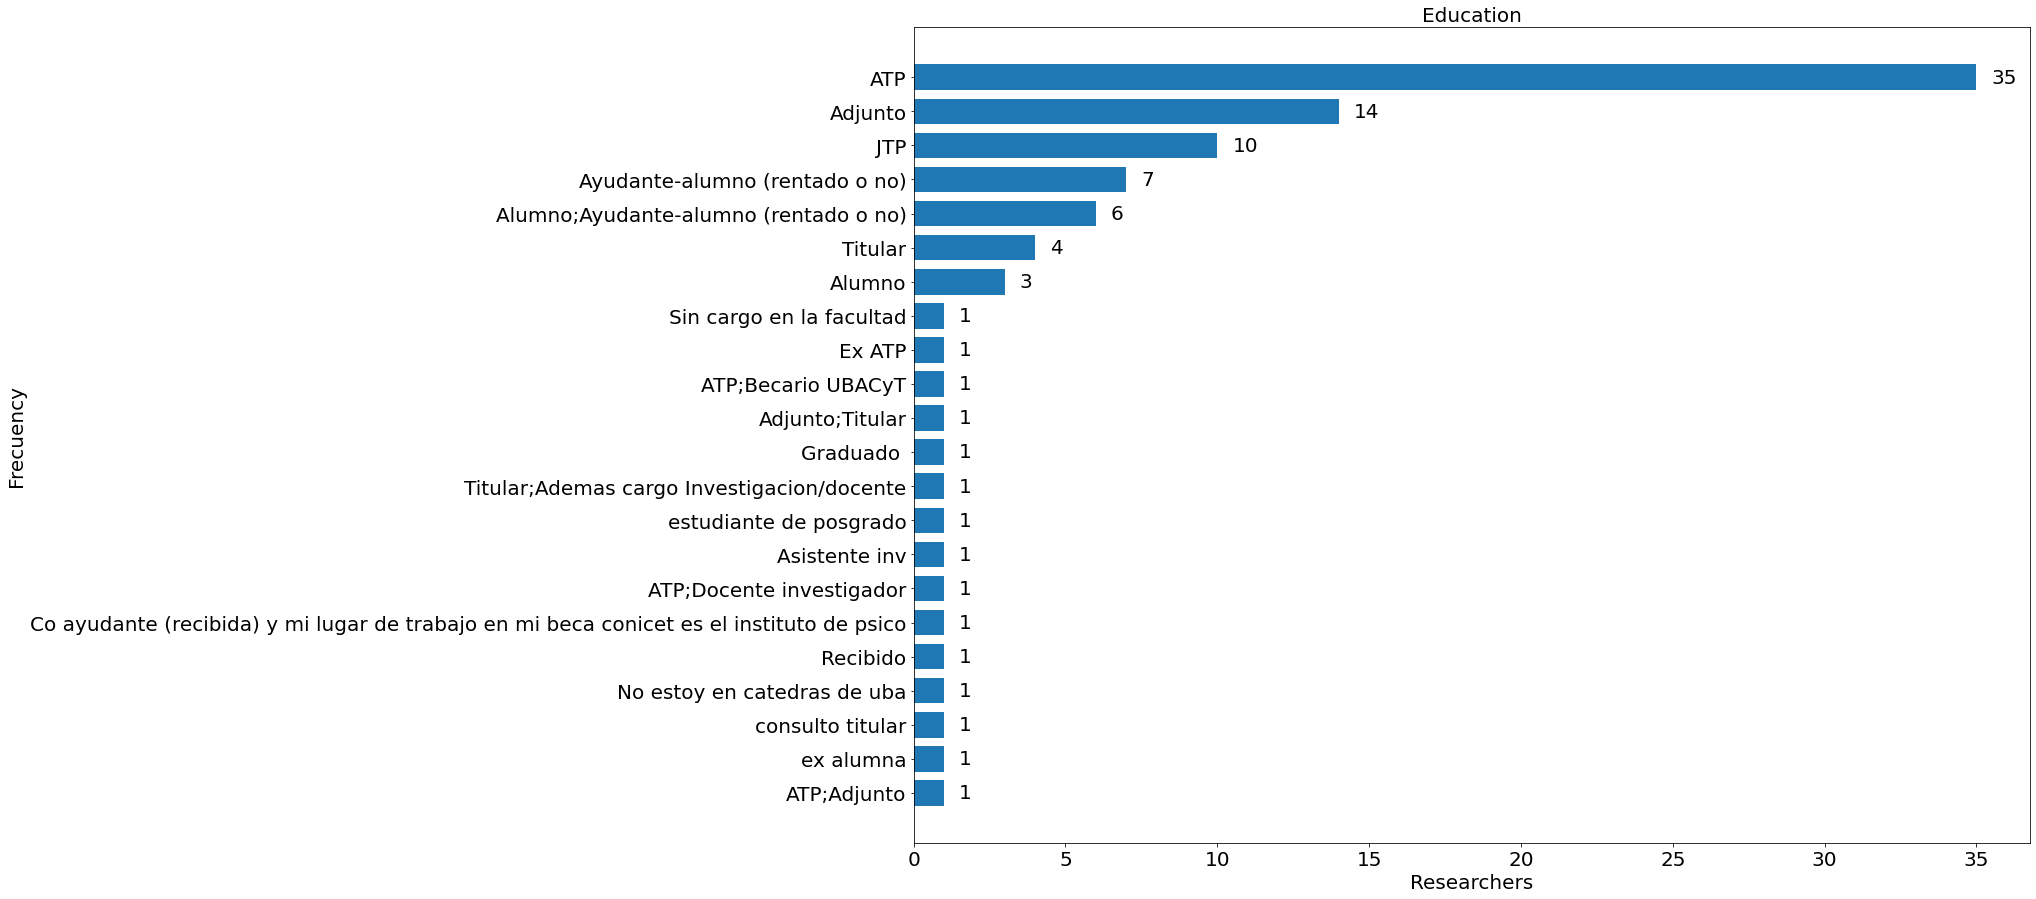

In [499]:
y = df["position"].value_counts(ascending=True)
fig, ax = plt.subplots(figsize=(20,15))
ax.tick_params(labelsize=20)
ax.barh(y.index, y, height=0.75)
ax.set_title('Education', fontsize=20)
ax.set_xlabel("Researchers", fontsize=20)
ax.set_ylabel("Frecuency", fontsize=20)
_, xmax = plt.xlim()
plt.xlim(0, xmax)
for i, v in enumerate(y):
    ax.text(v + .5, i, str(v), fontsize=20, ha='left', va='center')
plt.show()        

We can see that most respondents have the rol of "Ayudante de Trabajos Prácticos", by its acronym "ATP".

#### 2.4) Methodology

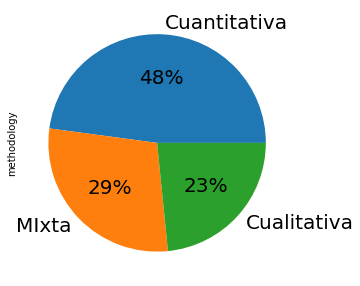

In [500]:
plt.figure(figsize=(10,5))
df["methodology"].value_counts().plot.pie(autopct='%1.0f%%', fontsize=20)

As it can be seen, most respondents consider themselves as practising predominantly a quantitative approach.  

#### 2.5) Age

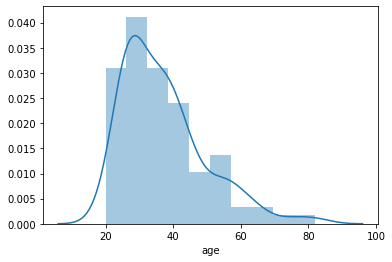

In [501]:
sns.distplot(df['age'])

It can be observed that most respondents is in the 20-40 age group.

### 3) Analyse the total percentage of “yes” responses to belief in crisis. Analyse as a function of career stage and methodological approach.

#### 3.1) Belief

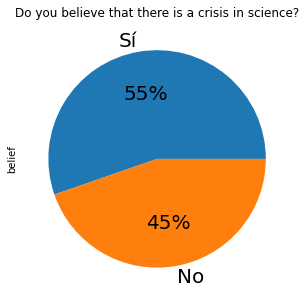

In [502]:
plt.title('Do you believe that there is a crisis in science?')
df["belief"].value_counts().plot.pie(figsize = (10,5), autopct = "%1.0f%%", fontsize = 20)

#### 3.2) Belief as a function of career stage.

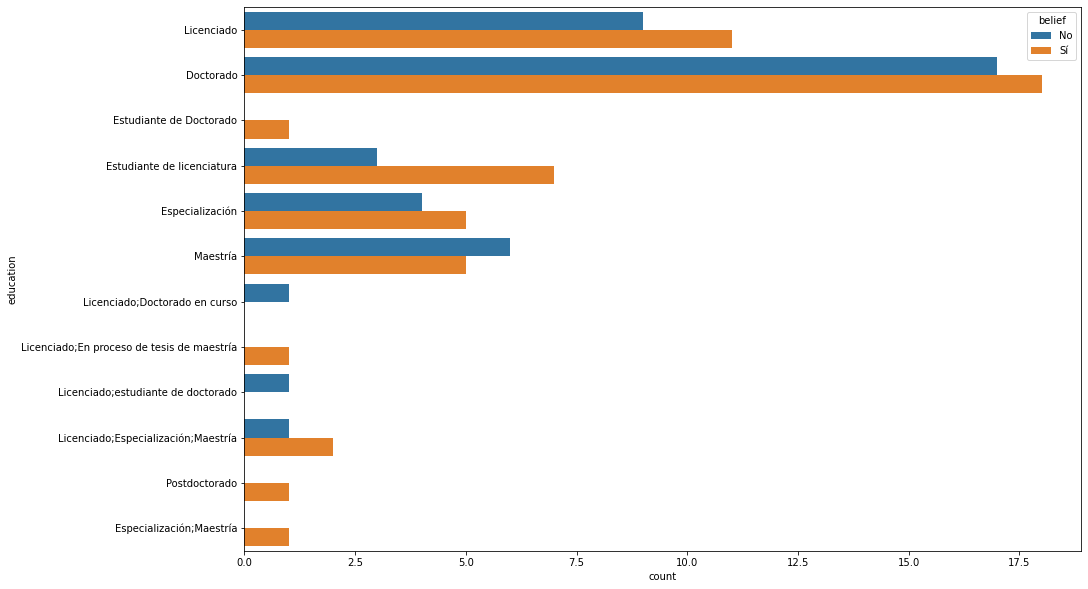

In [503]:
plt.figure(figsize=(15,10))
sns.countplot(y='education', hue='belief', data=df)

From the plot above, we can see that there is not important differences between belief in crisis in science and career stage.   

#### 3.2) Belief as a function of methodological approach.

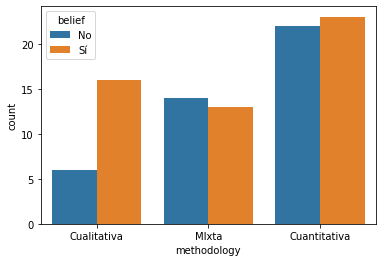

In [504]:
sns.countplot(x="methodology", hue="belief", data=df)

From this plot, we can see that there are not differences between usage of mixted and quantitative methodology as to belief in a crisis in science, while yes there is a small difference between those that use predominatly qualitative methodology. 

#### 3.3) Belief as a function of age.

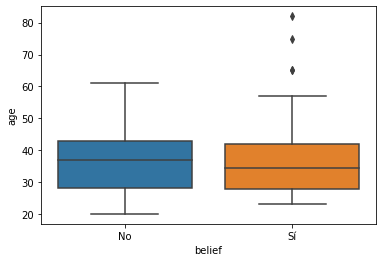

In [505]:
sns.boxplot(data=df, x='belief', y='age')

There seems to be no clear correlation between belief in crisis in science and the age of surveyed.

#### 4) Qualitative analysis of open field response to belief in crisis.

In [506]:
##### see how many comments use the word "replicability"

#### 5) Percentage of agreement with each, and combined, statements about replication crisis, p-value, publication bias. Analyse as a function of career stage and methodological approach.

In [507]:
def make_table(column):
    df = column.value_counts().to_frame().reset_index()
    df = df.T
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    return df

def tables_by_columns(index_col_1, index_col_2):
    l = []    
    for (i, column) in enumerate(df):
        if (i >= index_col_1 and i < index_col_2):
            l.append(make_table(df[column]))
    return l
            
def combinate_tables(l):
    df = pd.concat(l) 
    df.reset_index(level=0, inplace=True)
    df = df.rename(columns={'index': 'Measures'})
    return df

def convert_to_int(df):
    for (i, column) in enumerate(df):
        if (i > 0):
            df[[column]] = df[[column]].astype('Int64').fillna(0)
    return df
    
science = convert_to_int(combinate_tables(tables_by_columns(11, 28))) # the variables 11 until 28 are assesments about statements concerning science  
science.to_csv(r'../data/science.csv', index=False) # this table is exported to be ploted with the HH package in R

science

,Measures,Bastante de acuerdo,Algo de acuerdo,Muy de acuerdo,No sé,Nada de acuerdo
0,Gran parte de los investigadores solamente pub...,32,28,24,6,4
1,A las revistas científicas no les interesa pub...,37,18,27,3,9
2,Cuando leo un artículo tengo mayor confianza e...,19,18,10,7,40
3,Que un resultado no fuera estadísticamente sig...,1,21,2,6,64
4,"Una conclusión científica (por ejemplo, si un ...",21,31,9,6,27
5,Un resultado estadísticamente significativo es...,31,34,8,6,15
6,El valor de p < .05 confirma que el hallazgo s...,11,36,4,13,30
7,El valor de p = .001 confirma que el tamaño de...,12,21,8,22,31
8,Cuando los resultados de diferentes investigad...,30,21,36,2,5
9,La realización de estudios de replicación es n...,17,22,49,1,5


#### 6) Percentage of agreement with each, and combined, statements about perceived barriers. Analyse as a function of career stage and methodological approach.